In [1]:
    data_folder = '/home/jz/hard_disk/data/20230516_ane_downsample_compare/20230516_ane_data/data'
    electrode_info_folder = '/home/jz/hard_disk/data/20230516_ane_downsample_compare/20230516_ane_data/Bipolar_coor/'
    data_save_folder = '/home/jz/hard_disk/data/20231213_anes_data/5s_segment_400Hz_freq_domain/'

    mean_std_save_folder = '/home/jz/hard_disk/data/20231213_anes_data/'

In [2]:
from mat73 import loadmat

In [24]:
data = loadmat('/home/jz/hard_disk/data/20230516_ane_downsample_compare/20230516_ane_data/data/natus/Liminfeng_Bipolar_data.mat')


NameError: name 'np' is not defined

In [1]:
import mne.filter
import numpy as np

from utils import *
from configs import *
from mat73 import loadmat
from scipy import signal
import tqdm
import matplotlib.pyplot as plt

In [25]:
data = data['data']
data = data.astype(np.float64)

In [7]:
data

array([[-7.21711409e-04, -1.18646888e-04,  2.43012005e-03, ...,
        -9.63812032e-05, -4.73031203e-05,  2.92188645e-06],
       [-1.11749957e-03,  1.67163960e-03,  6.46788331e-03, ...,
        -1.62324416e-04, -5.40674087e-05,  5.58858377e-05],
       [ 1.06869094e-04,  5.22646423e-03, -9.01771154e-02, ...,
         3.08305090e-04,  1.23981683e-04, -6.16071592e-05],
       ...,
       [-8.59110254e-04,  2.48084564e-02,  8.47370267e-02, ...,
        -1.42441743e-05, -1.04347644e-05, -7.66067996e-06],
       [ 2.01958971e-03, -1.86929810e-02, -3.73657230e-02, ...,
         2.35261411e-04,  9.33333282e-05, -4.85722627e-05],
       [ 7.65912209e-04,  2.47227604e-02,  4.95231746e-02, ...,
         3.10422497e-04,  1.73037772e-04,  3.36284764e-05]])

In [8]:
data = data.astype(np.float64)

In [26]:
ch = 0
t = 0
window_length = 5
downsample_freq = 400


In [27]:
sample = data[ch, t * window_length * downsample_freq : (t+1) * window_length * downsample_freq]

In [38]:
def get_stft(x, fs, show_fs=-1, normalizing=None, **kwargs):
    f, t, Zxx = signal.stft(x, fs, nperseg=400, noverlap=390, **kwargs)

    if "return_onesided" in kwargs and kwargs["return_onesided"] == True:
        Zxx = Zxx[:show_fs]
        f = f[:show_fs]
    else:
        pass #TODO
        #Zxx = np.concatenate([Zxx[:,:,:show_fs], Zxx[:,:,-show_fs:]], axis=-1)
        #f = np.concatenate([f[:show_fs], f[-show_fs:]], axis=-1)
    Zxx = np.abs(Zxx)

    if normalizing=="zscore":
        Zxx = zscore(Zxx, axis=-1)#TODO is this order correct? I put it this way to prevent input nans
        if (Zxx.std() == 0).any():
            Zxx = np.ones_like(Zxx)

        Zxx = Zxx[:,10:-10]

    elif normalizing=="db":
        Zxx = np.log(Zxx)

    if np.isnan(Zxx).any():
        Zxx = np.nan_to_num(Zxx, nan=0.0)

    # return f, t, torch.Tensor(np.transpose(Zxx))
    return f, t, Zxx

In [39]:
f, t, Zxx = get_stft(sample, fs=downsample_freq, normalizing='db')

In [40]:
len(f)

201

In [41]:
len(f)

201

In [42]:
len(t)

201

In [18]:
Zxx

array([[ -3.85884385,  -3.02001141,  -1.27860894, ...,  -3.31051743,
         -1.9786986 ,  -3.89346074],
       [ -3.98229619,  -2.60199155,  -1.74597712, ...,  -2.80654951,
         -2.56737323,  -3.96873295],
       [ -4.23768313,  -3.46361661,  -3.42468749, ...,  -3.40419567,
         -5.15466887,  -4.20597801],
       ...,
       [-10.04733581,  -9.43276396,  -9.25640755, ..., -10.40591022,
         -9.58138498,  -9.22814852],
       [-10.09128433,  -9.14390758,  -8.97454718, ...,  -9.80306066,
        -10.12223   ,  -9.17962608],
       [-10.14501585,  -8.7766732 ,  -9.0640357 , ..., -10.2196753 ,
         -9.04036889,  -9.15699735]])

In [45]:
Zxx.shape

(65, 64)

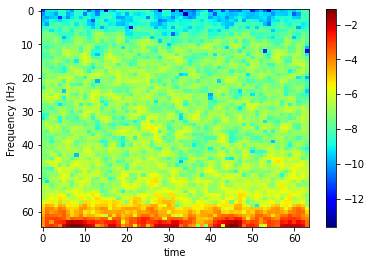

In [50]:

Zxx = np.flipud(Zxx)
cmap = 'jet'
plt.imshow(Zxx, cmap)

plt.axis('auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time')
plt.colorbar()

In [47]:
import matplotlib.pyplot as plt

In [43]:
f

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [44]:
t

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
       1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
       1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
       1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725, 1.75 , 1.775,
       1.8  , 1.825, 1.85 , 1.875, 1.9  , 1.925, 1.95 , 1.975, 2.   ,
       2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  , 2.225,
       2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425, 2.45 ,
       2.475, 2.5  , 2.525, 2.55 , 2.575, 2.6  , 2.625, 2.65 , 2.675,
       2.7  , 2.725, 2.75 , 2.775, 2.8  , 2.825, 2.85 , 2.875, 2.9  ,
       2.925, 2.95 , 2.975, 3.   , 3.025, 3.05 , 3.075, 3.1  , 3.125,
       3.15 , 3.175,

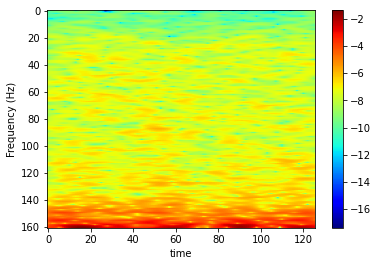

In [77]:
Zxx = np.flipud(Zxx)
cmap = 'jet'
plt.imshow(Zxx, cmap)

plt.axis('auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time')
plt.colorbar()

In [2]:
samples_path = getFilelist('/home/jz/hard_disk/data/20231213_anes_data/5s_segment_400Hz_freq_domain', ext='pkl')

In [19]:
sample_path = samples_path[375000]

In [20]:
sample_path

'/home/jz/hard_disk/data/20231213_anes_data/5s_segment_400Hz_freq_domain/Wangdepan_ch_3_time_866_5s.pkl'

In [21]:
sample = binary2dict(sample_path)['sample']

In [22]:
sample.shape

(129, 126)

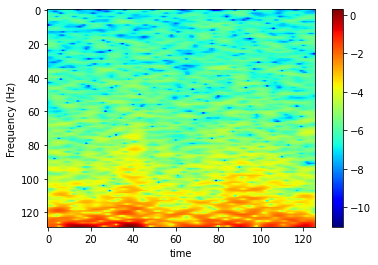

In [23]:
cmap = 'jet'
data = np.flipud(sample)
plt.imshow(data, cmap)

plt.axis('auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('time')
plt.colorbar()